# Section 2: Sentiment Analysis

## Sentiment Analysis without using Neural Networks

In [1]:
!pip install parsivar

In [2]:
# Loading NLTk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# NLP libraries
import parsivar
from parsivar import Normalizer, Tokenizer, FindStems, POSTagger, FindChunks

# plot
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import numpy as np
np.random.seed(0)

### Read dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's read sheet 1 of Labed-Sentemces.xlsx file.

In [5]:
from pandas import read_excel
my_sheet = 'Sheet1' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = r'/content/drive/MyDrive/AI-Internship/Labeled-Sentences.xlsx' 
df_sheet1 = read_excel(file_name, sheet_name = my_sheet)

In [6]:
df_sheet1.head()

,review,stars,label,food,cleanness,price,view,workers,space
0,سلام من یک ماه پیش در هتل شمس قشم بودم واقعا ه...,5,2,NaN,NaN,NaN,NaN,NaN,NaN
1,سلام بنده با همراه خانوادم چهار روز در این هتل...,4,2,NaN,NaN,NaN,NaN,NaN,NaN
2,ما از تاریخ ۵اسفند ۹۶تا۸اسفند ۹۶ در این هتل اق...,5,2,NaN,NaN,NaN,NaN,NaN,NaN
3,من 2روز در اين هتل به همراه همسرم اقامت داشتم ...,5,2,NaN,NaN,NaN,NaN,NaN,NaN
4,سفر بسیار خوبی بود هتل بسیار زیبا و قشنگی بود ...,5,2,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_sheet1.shape

(930, 9)

In [8]:
df_sheet1.label.value_counts()

2    638
0    153
1    139
Name: label, dtype: int64

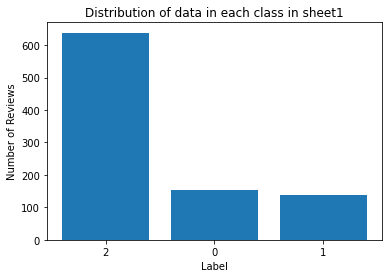

In [9]:
# distribution of data in each class
distribution = list(df_sheet1.label.value_counts())

import matplotlib.pyplot as plt
plt.bar(['2', '0', '1'] ,distribution)
plt.xlabel("Label")
plt.ylabel("Number of Reviews")
plt.title("Distribution of data in each class in sheet1")
plt.show()

Let's read sheet 2 of Labeled-Sentence.xlsx.

In [10]:
my_sheet = 'Sheet2' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = r'/content/drive/MyDrive/AI-Internship/Labeled-Sentences.xlsx' 
df_sheet2 = read_excel(file_name, sheet_name = my_sheet)

In [11]:
df_sheet2.shape

(703, 6)

In [13]:
df_sheet2.head()

,Unnamed: 0,star,label,good=1,fair=0,excellent=2
0,واقعا هتل خوبی بود...از لحاظ نزدیکی به دریا وم...,5,2,NaN,NaN,NaN
1,از همه مهمتر پرسنل های خیلی خوبی داشت,5,2,NaN,NaN,NaN
2,من ب این هتل امتیاز کامل میدم,5,2,NaN,NaN,NaN
3,از نظر ترانسفر فرودگاهی بسیار عالی برخورد,4,2,NaN,NaN,NaN
4,پرسنل عالی برخورد رستوران حرف نداشت,4,2,NaN,NaN,NaN


In [14]:
df_sheet2.label.value_counts()

2    565
0    111
1     27
Name: label, dtype: int64

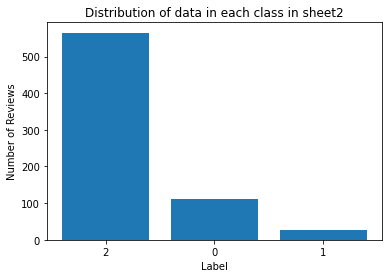

In [15]:
# distribution of data in each class
distribution = list(df_sheet2.label.value_counts())

import matplotlib.pyplot as plt
plt.bar(['2', '0', '1'] ,distribution)
plt.xlabel("Label")
plt.ylabel("Number of Reviews")
plt.title("Distribution of data in each class in sheet2")
plt.show()

Both sheets have an unbalanced dataset, but it seems that sheet 1 is better than sheet 2, Because it has more data and classes 0 and 1 have balanced distribution. So, we select shee1 and doing sentiment analysis on it.

Before we start doing sentiment analysis, we should read the PerSent.xlsx file that contains the word and polarity of each word.

In [22]:
my_sheet = 'Dataset' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = r'/content/drive/MyDrive/AI-Internship/PerSent.xlsx' 
persent = read_excel(file_name, sheet_name = my_sheet)

In [23]:
persent.head()

,Words,POS,Polarity
0,خوب,Adj,0.70
1,بد,Adj,-0.69
2,درست,Adj,0.00
3,غلط,Adj,-0.50
4,زیبا,Adj,0.00


In [24]:
persent.shape

(1490, 3)

In [28]:
persent.Words[774]

'ته دوزی'

### Remove irrelevant columns

Let's come back to sheet1 and do some preprocessing on it.

In [29]:
data = df_sheet1.copy()
data.drop(labels=['stars','food','cleanness','price','view','workers', 'space'], axis=1, inplace=True) # remove useless columns

data.head()

,review,label
0,سلام من یک ماه پیش در هتل شمس قشم بودم واقعا ه...,2
1,سلام بنده با همراه خانوادم چهار روز در این هتل...,2
2,ما از تاریخ ۵اسفند ۹۶تا۸اسفند ۹۶ در این هتل اق...,2
3,من 2روز در اين هتل به همراه همسرم اقامت داشتم ...,2
4,سفر بسیار خوبی بود هتل بسیار زیبا و قشنگی بود ...,2


In [30]:
data.shape

(930, 2)